In [1]:
import os
import glob
# import imageio

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats as sts
from scipy import stats
# plt.style.use('ggplot')   # Правильный стиль графиков   
plt.style.use('seaborn-whitegrid')

import seaborn as sns
sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])

deep_grey = '#3B4856' # основной тёмный / холодный цвет
sky_blue = '#348FEA'
marine_green = '#4CB9C0'
grass_green = '#97C804'
medium_yellow = '#FFC100' # основной светлый / тёплый цвет
sicilian_orange = '#E06A27'
fuchsia_pink = '#C81D6B'
saturated_violet = '#5002A7'
navy_blue = '#292183'
cool_white = '#F5FBFF'

# from matplotlib import rc
# rc('text', usetex=True)

%matplotlib inline

### Для градиентов

In [2]:
def mse(w):
    return 0.5*((2 - w)**2 + (3 - 2*w)**2)

def mse_grad(x, y, w):
    return -2 * x * (y - w * x)

grad_full = lambda w: mse_grad(1, 2, w) + mse_grad(2,3,w)

def line(w, w0):
    return grad_full(w)*(w - w0) + mse(w0)

w = np.linspace(-0.2, 3.4, 1000)

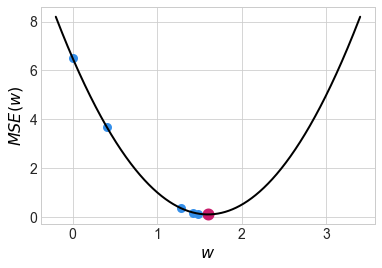

In [3]:
x_dots = np.array([1.6])
y_dots = mse(x_dots)

plt.plot(w, mse(w), lw=2, color='black'); 

plt.scatter(x_dots, y_dots, color=fuchsia_pink, lw=6)

# w_dots = np.array([0, 0.8, 1.2, 1.4])
w_dots = np.array([0, 0.4, 1.28, 1.424, 1.4848])

plt.scatter(w_dots, mse(w_dots), color=sky_blue, lw=3)
# for ww in w_dots:
#     plt.vlines(x = ww, ymin = 0, ymax = mse(ww), linestyle='--', lw=2, color=sky_blue)

plt.xlabel('$w$', fontsize=16, color='black')
plt.ylabel(r'$MSE(w)$', fontsize=16, color='black')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

### Для лоса

In [4]:
history = dict()

history['loss'] = [1639.3094482421875, 282.9186706542969, 146.64425659179688, 94.63375854492188, 75.1489486694336, 64.51031494140625, 55.56962203979492, 58.07489013671875, 57.12651824951172, 58.358856201171875, 54.73461151123047, 53.65199279785156, 51.209232330322266, 50.28985595703125, 50.835174560546875, 50.11240005493164, 48.98681640625, 49.81574249267578, 47.5593147277832, 47.20935821533203, 48.04635238647461, 47.764625549316406, 46.903175354003906, 49.402130126953125, 48.40681076049805, 43.74162673950195, 48.359954833984375, 43.28729248046875, 47.987030029296875, 44.10408401489258, 42.25083923339844, 39.78040313720703, 39.83837127685547, 40.8839111328125, 43.63114547729492, 40.10489273071289, 40.63694763183594, 37.427398681640625, 37.14278793334961, 37.0595817565918, 41.72021484375, 40.86906051635742, 48.31329345703125, 43.654502868652344, 36.380165100097656, 35.22960662841797, 36.010677337646484, 34.10212326049805, 36.018497467041016, 34.583072662353516, 32.49266815185547, 33.491539001464844, 32.949222564697266, 34.01264572143555, 31.547468185424805, 32.83308792114258, 35.552364349365234, 35.154571533203125, 33.01701736450195, 37.43125534057617, 40.1943473815918, 35.92734146118164, 34.74879455566406, 33.12535858154297, 30.40644645690918, 29.570833206176758, 29.96533966064453, 29.250293731689453, 29.740585327148438, 45.71363830566406, 32.90644073486328, 45.57210922241211, 38.765235900878906, 40.840301513671875, 35.703880310058594, 33.22300720214844, 28.659381866455078, 28.861492156982422, 31.20892906188965, 28.411209106445312, 29.507816314697266, 28.436317443847656, 30.74104118347168, 30.18288230895996, 28.194414138793945, 30.893709182739258, 29.20627212524414, 29.170894622802734, 32.709346771240234, 28.833267211914062, 26.165281295776367, 26.770849227905273, 25.783384323120117, 26.693422317504883, 26.011171340942383, 25.792652130126953, 27.69076919555664, 37.53397750854492, 27.06447982788086, 26.883562088012695, 29.128833770751953, 35.144290924072266, 31.07279396057129, 28.004056930541992, 28.026222229003906, 26.123931884765625, 26.725156784057617, 27.54691505432129, 29.173166275024414, 36.16921615600586, 30.131271362304688, 31.624597549438477, 27.08550453186035, 28.96439552307129, 26.652385711669922, 27.50912857055664, 32.580963134765625, 28.516817092895508, 32.923622131347656, 34.802581787109375, 26.459177017211914, 28.551923751831055, 56.44975662231445, 39.54421615600586, 46.07034683227539, 26.750123977661133, 29.350719451904297, 30.768733978271484, 26.974246978759766, 24.420286178588867, 62.9158935546875, 26.655061721801758, 27.68367576599121, 26.03567886352539, 23.91756248474121, 26.963407516479492, 31.96978187561035, 28.3765926361084, 33.99986267089844, 32.054786682128906, 26.420082092285156, 25.764629364013672, 23.02137565612793, 21.931440353393555, 22.35936737060547, 25.555797576904297, 26.863239288330078, 31.287269592285156, 31.386857986450195, 25.87636947631836, 26.76420783996582, 28.22612190246582, 24.088537216186523, 22.4272403717041, 22.501537322998047, 22.525495529174805, 24.59048843383789, 25.902141571044922, 22.498212814331055, 21.698427200317383, 26.533777236938477, 26.764928817749023, 23.024808883666992, 21.51490020751953, 20.748014450073242, 22.026763916015625, 25.71310806274414, 27.068588256835938, 21.29917335510254, 25.011999130249023, 23.934951782226562, 22.577699661254883, 21.763755798339844, 23.43964195251465, 24.89725685119629, 27.076679229736328, 22.82274627685547, 22.310392379760742, 23.62078285217285, 23.793010711669922, 21.701148986816406, 22.652271270751953, 22.6251220703125, 23.775678634643555, 21.787275314331055, 22.032821655273438, 21.8453311920166, 19.953067779541016, 21.1575870513916, 23.0452823638916, 19.351364135742188, 21.075855255126953, 22.257001876831055, 21.712297439575195, 21.672330856323242, 28.552244186401367, 45.87769317626953, 31.45594024658203, 28.0980167388916, 25.833534240722656, 22.90468978881836, 26.811731338500977, 20.03018569946289, 20.541305541992188, 21.27338981628418, 22.026592254638672, 22.165620803833008, 21.818910598754883, 19.65924835205078, 18.388134002685547, 23.44497299194336, 20.999435424804688, 19.24557876586914, 19.548568725585938, 18.01235580444336, 27.1646671295166, 20.264144897460938, 25.96869468688965, 19.363998413085938, 20.670825958251953, 20.015810012817383, 23.103290557861328, 21.984344482421875, 22.218637466430664, 22.035888671875, 21.94391441345215, 19.090417861938477, 19.120895385742188, 23.618188858032227, 24.669729232788086, 21.057098388671875, 21.85710334777832, 20.498422622680664, 24.61064338684082, 30.2794246673584, 25.30813217163086, 22.329681396484375, 28.91104507446289, 23.285451889038086, 18.7805118560791, 20.354461669921875, 20.416797637939453, 19.626110076904297, 18.780542373657227, 19.844097137451172, 17.535493850708008, 17.377248764038086, 19.854475021362305, 19.639984130859375, 19.728525161743164, 17.749467849731445, 17.465965270996094, 16.83129119873047, 17.379472732543945, 17.042139053344727, 17.75655174255371, 35.07453155517578, 23.13387107849121, 19.04954719543457, 21.03510093688965, 16.226795196533203, 16.22844696044922, 15.984682083129883, 15.717057228088379, 15.245080947875977, 18.38051414489746, 18.591949462890625, 16.946897506713867, 18.844228744506836, 18.900026321411133, 22.848400115966797, 16.562583923339844, 18.79732322692871, 23.6523380279541, 15.351908683776855, 17.967721939086914, 25.246912002563477, 18.50909423828125, 17.620773315429688, 18.320219039916992, 16.698354721069336, 17.13315773010254, 17.327693939208984, 16.103614807128906, 19.702987670898438, 17.01897430419922, 23.536956787109375, 19.592763900756836, 18.48055648803711, 18.888111114501953, 26.666521072387695, 18.488330841064453, 20.32411003112793, 15.955564498901367, 16.563297271728516, 22.429866790771484, 19.450735092163086, 18.99643325805664, 15.301015853881836, 17.772777557373047, 15.757316589355469, 19.642147064208984, 15.405014991760254, 16.465181350708008, 20.955026626586914, 22.798952102661133, 16.313945770263672, 13.99425983428955, 17.773788452148438, 16.4112491607666, 16.85205841064453, 17.031570434570312, 14.77985954284668, 17.26582908630371, 17.803213119506836, 14.980998992919922, 22.384944915771484, 20.710168838500977, 20.800922393798828, 20.14606475830078, 26.42262840270996, 19.56753158569336, 17.08121681213379, 17.582897186279297, 18.98959732055664, 15.79675579071045, 13.890681266784668, 16.3083553314209, 16.846330642700195, 14.461030006408691, 20.73801612854004, 16.131263732910156, 14.702737808227539, 18.90646743774414, 16.541454315185547, 18.11343002319336, 13.956308364868164, 13.689298629760742, 13.374204635620117, 14.224873542785645, 13.8380126953125, 26.883872985839844, 14.3528413772583, 19.629531860351562, 22.469974517822266, 15.10029411315918, 13.13632869720459, 16.30173683166504, 18.311269760131836, 17.8986759185791, 12.611644744873047, 13.025884628295898, 13.297006607055664, 14.477628707885742, 15.675698280334473, 15.762173652648926, 14.084614753723145, 19.243947982788086, 15.93809700012207, 12.735878944396973, 12.660808563232422, 13.5728759765625, 12.730238914489746, 13.861462593078613, 14.41035270690918, 12.515453338623047, 14.129934310913086, 14.95441722869873, 14.745882034301758, 13.961584091186523, 11.871837615966797, 12.689959526062012, 12.561039924621582, 14.02160358428955, 12.562836647033691, 14.229670524597168, 13.461005210876465, 16.056543350219727, 20.66562271118164, 14.838584899902344, 15.785252571105957, 14.17597770690918, 17.313976287841797, 14.14355754852295, 15.325138092041016, 14.333718299865723, 18.072256088256836, 24.92840003967285, 16.334327697753906, 16.01967430114746, 14.538923263549805, 13.038969039916992, 12.44176959991455, 12.32069206237793, 12.047162055969238, 16.56902503967285, 13.301165580749512, 12.395140647888184, 13.853084564208984, 12.878255844116211, 13.08426570892334, 13.287628173828125, 12.518213272094727, 11.839438438415527, 10.986662864685059, 11.776347160339355, 22.259477615356445, 13.504796981811523, 14.542196273803711, 12.21938419342041, 12.13772964477539, 14.702629089355469, 15.358101844787598, 14.244332313537598, 11.75780963897705, 12.247476577758789, 15.980616569519043, 13.186164855957031, 13.526436805725098, 14.706966400146484, 13.26387882232666, 10.784961700439453, 19.49985694885254, 26.22382926940918, 20.038358688354492, 16.803674697875977, 13.112974166870117, 15.0512056350708, 17.335952758789062, 16.28656005859375, 11.234454154968262, 10.636382102966309, 10.310368537902832, 12.574180603027344, 12.466565132141113, 12.93194580078125, 11.5347261428833, 11.20521068572998, 10.815747261047363, 10.824759483337402, 10.397309303283691, 11.950247764587402, 11.420369148254395, 11.012276649475098, 11.407992362976074, 11.85495662689209, 10.534908294677734, 10.799083709716797, 10.18181037902832, 11.932903289794922, 11.865938186645508, 10.840862274169922, 11.20557975769043, 12.137738227844238, 12.004138946533203, 10.8189115524292, 11.157209396362305, 10.99933910369873, 10.912198066711426, 9.94140625, 9.676974296569824, 13.591872215270996, 12.547544479370117, 10.350358963012695, 10.05501937866211, 13.73727035522461, 13.82625961303711, 14.72189998626709, 11.02888298034668, 15.520217895507812, 30.422847747802734, 18.612716674804688, 14.839838981628418, 15.499124526977539, 14.122060775756836, 10.7654447555542, 17.54051399230957, 12.124198913574219, 10.545655250549316, 11.001399040222168, 12.541975975036621, 17.243030548095703, 12.614871978759766, 12.030078887939453, 9.994878768920898, 9.770525932312012, 10.788839340209961, 9.95999813079834, 10.410265922546387, 9.913851737976074, 10.88878059387207, 11.469371795654297, 9.575606346130371, 9.311981201171875, 10.007790565490723, 8.953203201293945, 10.3878755569458, 9.689465522766113, 8.588692665100098, 10.092735290527344]
history['val_loss'] = [366.92572021484375, 260.60076904296875, 102.63727569580078, 104.15398406982422, 69.11674499511719, 72.02112579345703, 65.74524688720703, 65.68018341064453, 77.69874572753906, 63.783382415771484, 71.71068572998047, 64.50437927246094, 65.77509307861328, 61.88385009765625, 60.887027740478516, 63.09236526489258, 61.6431999206543, 57.962825775146484, 60.578147888183594, 64.83696746826172, 56.95103454589844, 56.64534378051758, 56.428627014160156, 56.89998245239258, 64.8520736694336, 57.373451232910156, 54.226409912109375, 55.25458908081055, 59.21824264526367, 55.29373550415039, 58.619449615478516, 50.741336822509766, 51.951236724853516, 49.699886322021484, 48.95646286010742, 48.155941009521484, 47.810333251953125, 47.54018020629883, 46.64683151245117, 46.33702087402344, 52.32274627685547, 54.27029800415039, 55.37430191040039, 46.102970123291016, 44.94667053222656, 44.3602294921875, 45.36328887939453, 47.761558532714844, 49.48515319824219, 47.05232238769531, 43.45288848876953, 44.12283706665039, 48.822967529296875, 41.52922058105469, 42.06379318237305, 49.91767883300781, 45.55373764038086, 46.76496505737305, 53.563873291015625, 60.72086715698242, 64.29853057861328, 42.51307678222656, 41.23136520385742, 39.860382080078125, 40.04268264770508, 39.54426574707031, 39.25917434692383, 39.22875213623047, 49.63751983642578, 47.467655181884766, 40.143402099609375, 43.811676025390625, 40.719696044921875, 54.48076248168945, 54.89173889160156, 45.99214172363281, 42.4552116394043, 45.38335037231445, 44.19862365722656, 49.33073806762695, 41.281978607177734, 46.707611083984375, 36.516902923583984, 38.268192291259766, 38.03977584838867, 36.4602165222168, 44.51774597167969, 44.54509353637695, 49.44889450073242, 36.84348678588867, 35.9332275390625, 36.27322769165039, 40.234615325927734, 37.59955596923828, 41.569942474365234, 41.21385955810547, 41.79691696166992, 44.50931930541992, 37.276222229003906, 39.222694396972656, 50.97388458251953, 42.23944091796875, 39.06828308105469, 40.74525451660156, 37.30427551269531, 34.99789810180664, 42.86665725708008, 51.925804138183594, 34.7637825012207, 42.86638259887695, 41.21961212158203, 44.338844299316406, 44.75171661376953, 35.51662063598633, 36.705318450927734, 45.822425842285156, 36.9109001159668, 35.558494567871094, 43.38082504272461, 45.914154052734375, 46.56654357910156, 42.844146728515625, 60.34938049316406, 82.14995574951172, 47.728675842285156, 40.904170989990234, 44.39316177368164, 37.186283111572266, 33.823673248291016, 76.86107635498047, 42.753021240234375, 39.56026840209961, 44.64430236816406, 41.57603073120117, 37.284889221191406, 38.99997329711914, 40.67481231689453, 36.82965850830078, 51.22694396972656, 39.2076530456543, 34.367366790771484, 34.699623107910156, 33.70706558227539, 33.03330993652344, 34.1804313659668, 37.75457000732422, 44.03447723388672, 36.06104278564453, 39.06596374511719, 38.78141403198242, 34.74195861816406, 38.36320114135742, 36.35861587524414, 32.82451629638672, 32.95608139038086, 35.14673614501953, 36.30405807495117, 35.47815704345703, 34.835914611816406, 34.5391845703125, 42.16333770751953, 42.93939208984375, 33.88243865966797, 33.289329528808594, 32.56901168823242, 37.42195510864258, 43.457969665527344, 34.33029556274414, 39.99857711791992, 34.0824089050293, 41.586181640625, 32.97059631347656, 37.8864860534668, 35.461021423339844, 36.3717041015625, 36.43593215942383, 33.688209533691406, 32.5186767578125, 33.76275634765625, 40.264713287353516, 45.95876693725586, 34.97593688964844, 32.949466705322266, 37.722042083740234, 32.70589828491211, 32.114280700683594, 34.03609085083008, 36.20212936401367, 31.8105525970459, 34.146949768066406, 33.11946487426758, 32.50048065185547, 39.923213958740234, 34.862060546875, 58.86037063598633, 44.74171829223633, 53.71970748901367, 34.236751556396484, 44.183082580566406, 31.20272445678711, 42.784690856933594, 34.92456817626953, 32.66398239135742, 42.029781341552734, 35.13047409057617, 42.225059509277344, 35.49757385253906, 32.675621032714844, 33.23994445800781, 45.08823013305664, 31.53740692138672, 30.36466407775879, 37.08132553100586, 31.545560836791992, 37.36792755126953, 30.835554122924805, 55.09636688232422, 39.50965118408203, 36.56947708129883, 35.86759948730469, 33.04237365722656, 40.34862518310547, 30.678409576416016, 32.32570266723633, 36.383358001708984, 31.424970626831055, 31.495683670043945, 32.425479888916016, 34.862422943115234, 32.83045959472656, 39.71160888671875, 29.393041610717773, 31.28557777404785, 52.06937789916992, 39.657806396484375, 30.24032211303711, 33.69392776489258, 37.12896728515625, 30.634782791137695, 31.239973068237305, 35.13969802856445, 32.195281982421875, 31.271530151367188, 32.83189010620117, 30.710193634033203, 28.257686614990234, 31.39813232421875, 37.2408561706543, 29.511444091796875, 31.478479385375977, 28.96282196044922, 29.29874610900879, 27.219018936157227, 29.021379470825195, 34.1770133972168, 40.711605072021484, 44.16374206542969, 29.81520652770996, 38.32836151123047, 30.208179473876953, 29.185047149658203, 27.892480850219727, 28.315690994262695, 27.54025650024414, 29.824230194091797, 34.849117279052734, 28.20740509033203, 32.73426055908203, 32.84315490722656, 37.420921325683594, 29.645004272460938, 27.916955947875977, 55.855770111083984, 29.474777221679688, 30.793659210205078, 29.832275390625, 37.18741989135742, 27.8627872467041, 45.162933349609375, 26.28326988220215, 29.58745574951172, 28.147781372070312, 26.809253692626953, 38.431907653808594, 27.91656494140625, 42.57769012451172, 29.389772415161133, 34.96059036254883, 30.370460510253906, 52.68833923339844, 27.680408477783203, 32.34013748168945, 28.22831153869629, 28.244083404541016, 42.597930908203125, 29.207534790039062, 27.692716598510742, 29.320140838623047, 28.338472366333008, 28.61217498779297, 33.200599670410156, 25.79574203491211, 27.639904022216797, 24.83024787902832, 44.46102523803711, 26.324560165405273, 25.96859359741211, 32.50028610229492, 25.653669357299805, 31.609609603881836, 27.592357635498047, 26.799867630004883, 26.506725311279297, 31.40839958190918, 27.665969848632812, 28.945703506469727, 25.060466766357422, 32.57733154296875, 37.08989715576172, 28.676410675048828, 30.863801956176758, 27.765111923217773, 33.52685546875, 24.885845184326172, 24.60199737548828, 26.645233154296875, 27.76593589782715, 30.368793487548828, 25.12164306640625, 42.663883209228516, 28.75113868713379, 25.234712600708008, 37.38652801513672, 35.28952407836914, 31.19056510925293, 27.884973526000977, 23.552873611450195, 23.92457389831543, 24.793338775634766, 25.183948516845703, 38.06258010864258, 24.77799415588379, 29.206418991088867, 37.76521682739258, 25.42938232421875, 23.39020538330078, 29.41231346130371, 22.62791633605957, 45.66283416748047, 23.44635009765625, 22.836734771728516, 23.301748275756836, 24.83278465270996, 24.354673385620117, 23.58357810974121, 28.951400756835938, 36.45527267456055, 23.213417053222656, 23.832059860229492, 22.803956985473633, 24.910160064697266, 24.251750946044922, 24.027210235595703, 23.52863121032715, 26.40329360961914, 21.558399200439453, 22.83391761779785, 23.70951271057129, 27.49935531616211, 23.35002899169922, 21.319040298461914, 23.06926727294922, 22.428556442260742, 21.55261993408203, 22.0855770111084, 21.966472625732422, 21.442241668701172, 28.641061782836914, 22.428735733032227, 28.179210662841797, 28.456262588500977, 25.895523071289062, 22.967683792114258, 25.361942291259766, 22.360380172729492, 24.03498077392578, 52.62574768066406, 22.716899871826172, 28.87544059753418, 25.885711669921875, 22.180320739746094, 21.99823570251465, 25.960289001464844, 22.41132926940918, 22.062854766845703, 22.755739212036133, 25.22612762451172, 20.546993255615234, 22.93027114868164, 20.5037841796875, 21.751449584960938, 27.651945114135742, 24.007366180419922, 24.452150344848633, 21.71041488647461, 32.618770599365234, 24.904979705810547, 24.249954223632812, 24.72626495361328, 22.866113662719727, 24.64325714111328, 27.380287170410156, 26.112133026123047, 22.25022315979004, 22.074861526489258, 27.90090560913086, 20.517547607421875, 25.57060432434082, 21.61509132385254, 24.030109405517578, 20.38458251953125, 33.66318130493164, 48.09584426879883, 21.489974975585938, 19.18751335144043, 26.38984489440918, 21.458938598632812, 29.097719192504883, 33.92447280883789, 19.85481834411621, 23.998411178588867, 19.645959854125977, 21.464725494384766, 21.473499298095703, 22.080202102661133, 21.129728317260742, 23.354331970214844, 19.898908615112305, 20.723657608032227, 21.119245529174805, 19.81060791015625, 22.254425048828125, 23.852455139160156, 20.82431411743164, 22.051742553710938, 21.198013305664062, 20.536136627197266, 20.15422821044922, 20.895341873168945, 25.618797302246094, 21.77447509765625, 21.108348846435547, 22.640487670898438, 21.060108184814453, 24.648508071899414, 21.964757919311523, 22.389328002929688, 19.3957576751709, 21.850065231323242, 19.9434871673584, 20.167043685913086, 19.654361724853516, 21.4218807220459, 22.137378692626953, 21.635753631591797, 25.407848358154297, 29.398815155029297, 23.02405548095703, 26.075725555419922, 37.08479309082031, 29.162607192993164, 19.8271541595459, 22.1552734375, 27.99005699157715, 21.2496280670166, 19.443115234375, 22.02788543701172, 20.403974533081055, 18.77747344970703, 21.53997039794922, 21.890392303466797, 21.327409744262695, 23.597883224487305, 19.593286514282227, 19.335107803344727, 17.709901809692383, 19.584928512573242, 19.869157791137695, 18.17435073852539, 20.573469161987305, 25.691354751586914, 18.02483367919922, 18.016569137573242, 21.707216262817383, 18.047449111938477, 19.798656463623047, 22.1341495513916, 18.367965698242188, 18.6148681640625, 19.017560958862305]



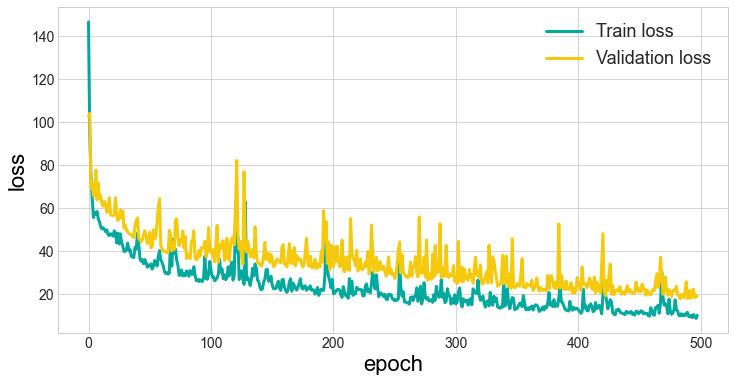

In [5]:
start = 2

plt.figure(figsize=(12,6))
plt.plot(history['loss'][start:], lw=3)
plt.plot(history['val_loss'][start:], lw=3)

plt.xlabel('epoch', fontsize=22, color='black')
plt.ylabel('loss', fontsize=22, color='black')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(['Train loss', 'Validation loss'], fontsize=18);

In [6]:
history = dict()

history['loss'] = [570.821533203125, 508.3336486816406, 440.1446838378906, 356.2568359375, 256.93499755859375, 162.33935546875, 103.67993927001953, 78.09703826904297, 60.14280319213867, 45.813846588134766, 37.43733215332031, 31.57563591003418, 27.78644371032715, 25.20331573486328, 23.626277923583984, 21.876977920532227, 20.665420532226562, 19.648799896240234, 18.50033950805664, 17.541128158569336, 16.752845764160156, 16.12055778503418, 15.598371505737305, 14.927419662475586, 14.379923820495605, 14.169595718383789, 13.481497764587402, 13.041482925415039, 12.695536613464355, 12.290760040283203, 12.109353065490723, 11.730982780456543, 11.482783317565918, 11.325058937072754, 11.04322338104248, 11.103693962097168, 10.653861999511719, 10.499526023864746, 10.541593551635742, 10.469185829162598, 10.005904197692871, 9.932144165039062, 10.0260009765625, 9.970340728759766, 9.80919075012207, 9.632762908935547, 9.708086013793945, 9.437108039855957, 9.321414947509766, 9.530009269714355, 9.159714698791504, 8.993042945861816, 8.89865779876709, 8.778114318847656, 8.733914375305176, 8.681790351867676, 8.692423820495605, 8.567964553833008, 8.494437217712402, 8.463891983032227, 8.492768287658691, 8.400408744812012, 8.356931686401367, 8.239974021911621, 8.158951759338379, 8.308890342712402, 7.9794816970825195, 8.221115112304688, 8.049962997436523, 9.10741138458252, 8.529072761535645, 8.029314994812012, 7.8710455894470215, 7.527530670166016, 7.696732521057129, 7.426229476928711, 7.391566753387451, 7.278920650482178, 7.287470817565918, 7.295859336853027, 7.25035285949707, 7.3429131507873535, 7.356905460357666, 7.3636674880981445, 7.1419196128845215, 7.069480895996094, 7.3346266746521, 6.990960597991943, 6.9183268547058105, 7.05667781829834, 6.807265758514404, 6.682523250579834, 6.779729843139648, 7.2649664878845215, 6.6723504066467285, 6.9512505531311035, 6.586449146270752, 6.529383182525635, 6.588258743286133, 6.473660945892334, 6.439641952514648, 6.395624160766602, 6.270110130310059, 6.49540901184082, 6.204017162322998, 6.42535924911499, 6.311315536499023, 6.146790504455566, 6.02213716506958, 5.987536907196045, 5.963657379150391, 5.926616668701172, 6.2875657081604, 6.004764556884766, 5.995314121246338, 5.8837809562683105, 5.9684295654296875, 5.728600025177002, 5.763416290283203, 5.770857810974121, 5.597630500793457, 5.638031959533691, 5.492801189422607, 5.669376850128174, 5.478585720062256, 5.586166858673096, 5.408456802368164, 5.557949542999268, 5.6578593254089355, 5.497180461883545, 5.333309173583984, 5.3509674072265625, 5.277972221374512, 5.214293479919434, 5.2635416984558105, 5.0781402587890625, 5.125568866729736, 5.423098564147949, 5.293662071228027, 5.108850002288818, 5.007678508758545, 5.488492965698242, 5.496663570404053, 5.062770843505859, 4.922855854034424, 4.83941650390625, 4.8476033210754395, 4.781283378601074, 4.777379035949707, 4.7195539474487305, 4.7177653312683105, 4.8195905685424805, 4.7069244384765625, 4.836526870727539, 4.732564449310303, 4.558511257171631, 4.7325119972229, 4.563591003417969, 4.589313507080078, 4.5034098625183105, 4.482719898223877, 4.595957279205322, 4.4618120193481445, 4.491478443145752, 4.4497833251953125, 4.499841213226318, 4.444136619567871, 4.289379119873047, 4.8641862869262695, 4.5384111404418945, 4.374493598937988, 4.288422107696533, 4.210797309875488, 4.5957722663879395, 4.350796222686768, 4.3293137550354, 4.248343467712402, 4.1031694412231445, 4.105034351348877, 4.088338375091553, 4.040768146514893, 3.981523275375366, 3.938526153564453, 3.9840190410614014, 4.063599586486816, 4.092120170593262, 4.090599060058594, 3.9708104133605957, 3.93711256980896, 4.014892101287842, 4.050281047821045, 4.165689468383789, 4.026235103607178, 3.840454578399658, 3.7679405212402344, 3.72511887550354, 3.7263436317443848, 3.9747726917266846, 3.7727017402648926, 3.7779197692871094, 3.812798261642456, 3.7604219913482666, 3.9026148319244385, 3.585554599761963, 3.6357920169830322, 3.7266721725463867, 3.764843463897705, 3.6897993087768555, 4.050625324249268, 3.892677068710327, 5.037336349487305, 4.302386283874512, 3.814347743988037, 3.637620210647583, 3.920260429382324, 3.537193536758423, 3.4373345375061035, 3.457801103591919, 4.492587089538574, 5.415275573730469, 4.001405715942383, 3.637944459915161, 3.5401415824890137, 3.5437653064727783, 3.408766508102417, 3.3131511211395264, 3.297180652618408, 3.268538475036621, 3.251345157623291, 3.2834486961364746, 3.2808423042297363, 3.2345075607299805, 3.1849660873413086, 3.1680707931518555, 3.252915620803833, 3.2718725204467773, 3.298973321914673, 3.5073740482330322, 3.282294988632202, 3.151561737060547, 3.104973077774048, 3.113560914993286, 3.079305648803711, 4.11271858215332, 4.148109436035156, 3.3725316524505615, 3.2543556690216064, 3.1734142303466797, 3.0388004779815674, 3.009046792984009, 3.224036455154419, 3.2604475021362305, 3.264195680618286, 3.091778039932251, 3.092120885848999, 3.16597580909729, 2.9814743995666504, 2.9786746501922607, 3.0426523685455322, 3.0690786838531494, 2.951493740081787, 3.0254886150360107, 2.879459857940674, 2.884169340133667, 3.0499637126922607, 3.1861348152160645, 3.133317708969116, 3.966459274291992, 3.7869138717651367, 3.104501724243164, 2.868490695953369, 2.8387537002563477, 2.759059429168701, 2.781471014022827, 2.8694217205047607, 2.9408090114593506, 2.759775400161743, 2.6919150352478027, 2.7314186096191406, 2.723684072494507, 2.8467822074890137, 2.718052864074707, 2.82175874710083, 2.7446131706237793, 2.816179037094116, 2.7878966331481934, 2.6225345134735107, 2.5647130012512207, 2.543205499649048, 2.562730550765991, 2.6259915828704834, 2.566256046295166, 2.6173665523529053, 2.712523937225342, 2.617739200592041, 2.648813247680664, 2.794370174407959, 2.823751926422119, 2.763378143310547, 2.6050710678100586, 2.4832711219787598, 2.6420297622680664, 3.407764434814453, 2.7738139629364014, 2.7431373596191406, 2.6276495456695557, 2.5195484161376953, 2.6686925888061523, 2.607257843017578, 2.4160869121551514, 2.3658485412597656, 2.3936657905578613, 2.3852055072784424, 2.450878858566284, 2.3978917598724365, 2.376194953918457, 2.5480661392211914, 2.4587562084198, 2.4541165828704834, 2.362597942352295, 2.460598945617676, 2.6498947143554688, 2.455514907836914, 2.4348368644714355, 2.3411128520965576, 2.3765902519226074, 2.391925573348999, 2.3869359493255615, 2.328294515609741, 2.2998647689819336, 2.5270137786865234, 2.406702756881714, 2.5413594245910645, 2.3617894649505615, 2.3365652561187744, 2.339723825454712, 2.282754898071289, 2.2019193172454834, 2.1703314781188965, 2.277393341064453, 2.412510395050049, 2.2974085807800293, 2.291325569152832, 2.2659354209899902, 2.236703395843506, 2.105994462966919, 2.148254156112671, 2.2142837047576904, 2.553882598876953, 2.2259581089019775, 2.6642329692840576, 2.2285139560699463, 2.1166086196899414, 2.1204071044921875, 2.049018144607544, 2.1061928272247314, 2.459956407546997, 2.231853723526001, 2.298682928085327, 2.280431032180786, 2.0098178386688232, 1.997387170791626, 2.0661816596984863, 2.097768545150757, 2.125073194503784, 2.0031096935272217, 2.1236116886138916, 2.1649043560028076, 2.2141101360321045, 2.492063045501709, 2.1138916015625, 2.019085645675659, 1.9578766822814941, 1.9925702810287476, 2.11899733543396, 2.001532793045044, 2.7030093669891357, 2.3743979930877686, 2.2285056114196777, 2.1710286140441895, 1.987350583076477, 2.0235626697540283, 2.0472662448883057, 2.4773290157318115, 2.1502561569213867, 1.8962957859039307, 1.8150854110717773, 1.811618447303772, 1.8791533708572388, 1.8245739936828613, 2.416616201400757, 2.541795253753662, 2.231473922729492, 1.9734083414077759, 1.8795411586761475, 2.138462781906128, 2.0921244621276855, 1.9377632141113281, 1.9401715993881226, 1.8542044162750244, 1.7786929607391357, 1.827454924583435, 1.7679730653762817, 1.790238618850708, 1.729852557182312, 1.8290772438049316, 1.8796851634979248, 1.8416285514831543, 1.8118014335632324, 1.8258417844772339, 1.9184767007827759, 1.804865837097168, 1.75507390499115, 1.7449482679367065, 1.891830563545227, 1.732159972190857, 2.3790688514709473, 2.0471203327178955, 1.7758698463439941, 1.9787688255310059, 1.9012012481689453, 1.8678637742996216, 2.173128604888916, 1.7768250703811646, 1.6921167373657227, 1.674633264541626, 1.6911530494689941, 1.860144853591919, 1.7801122665405273, 1.6270583868026733, 1.6797847747802734, 1.7329599857330322, 1.793052077293396, 1.6531033515930176, 1.5962717533111572, 1.519309639930725, 1.6342540979385376, 1.655505895614624, 1.6806042194366455, 1.5943310260772705, 1.84315025806427, 1.6637247800827026, 2.559542655944824, 1.8667963743209839, 1.618703007698059, 1.619245171546936, 1.6378144025802612, 1.5605140924453735, 1.8202520608901978, 1.6003015041351318, 1.645064115524292, 1.4730637073516846, 1.4986358880996704, 1.9974645376205444, 1.8339142799377441, 1.5650469064712524, 1.579340934753418, 1.5725175142288208, 1.4469901323318481, 1.3993974924087524, 1.3839296102523804, 1.5228840112686157, 1.4405947923660278, 1.3852629661560059, 1.4021607637405396, 1.394280195236206, 1.541286587715149, 1.6767498254776, 1.9279303550720215, 1.8786804676055908, 1.837529182434082, 1.560091257095337, 1.435078740119934, 1.4081045389175415, 1.3552120923995972, 1.3357828855514526, 1.3537099361419678, 1.3771892786026, 1.402576208114624, 1.5005258321762085, 1.5585793256759644, 1.48287832736969, 1.553713321685791, 1.3222408294677734, 1.330165147781372, 1.3258404731750488, 1.331780195236206, 1.2696250677108765, 1.2705373764038086, 1.2895852327346802, 1.256427526473999, 1.3004748821258545, 1.4030131101608276, 1.3328595161437988, 1.2811908721923828, 1.345401406288147, 1.2270997762680054, 1.2272711992263794, 1.1720560789108276, 1.269448161125183]
history['loss'] = np.array(history['loss'])
history['val_loss'] = [606.5756225585938, 541.7548217773438, 461.2519836425781, 360.3717956542969, 248.5876922607422, 159.1498565673828, 109.79029083251953, 82.8485336303711, 63.277584075927734, 49.54035568237305, 40.366737365722656, 33.53525161743164, 29.443702697753906, 26.901004791259766, 24.726669311523438, 23.264305114746094, 21.75188446044922, 20.948001861572266, 19.899927139282227, 19.12200164794922, 18.485910415649414, 17.966209411621094, 17.4957332611084, 17.351205825805664, 16.8026065826416, 16.64299774169922, 16.244976043701172, 16.62548065185547, 16.25542449951172, 15.641822814941406, 15.81351089477539, 15.739468574523926, 15.461431503295898, 15.725706100463867, 15.123826026916504, 15.006932258605957, 15.33181381225586, 15.077930450439453, 15.318663597106934, 15.291511535644531, 15.624466896057129, 15.188323020935059, 14.761783599853516, 15.306235313415527, 15.06174373626709, 14.691855430603027, 15.54380989074707, 15.163043975830078, 14.305037498474121, 14.146604537963867, 14.515077590942383, 14.43423843383789, 14.607830047607422, 14.390551567077637, 14.563884735107422, 14.733558654785156, 14.786273002624512, 15.104029655456543, 14.91624641418457, 14.844404220581055, 14.651294708251953, 15.049664497375488, 14.505996704101562, 14.934642791748047, 15.065381050109863, 14.706618309020996, 15.434552192687988, 15.356289863586426, 15.18828773498535, 15.982955932617188, 15.71181869506836, 15.13380241394043, 15.49919891357422, 15.237995147705078, 15.277862548828125, 15.580885887145996, 15.34570026397705, 15.416376113891602, 15.337677001953125, 15.332159042358398, 15.862940788269043, 15.438342094421387, 15.939183235168457, 15.172935485839844, 15.00344181060791, 14.807238578796387, 15.054993629455566, 15.307373046875, 15.168540000915527, 15.260103225708008, 14.775429725646973, 14.96432113647461, 15.21347427368164, 16.36005210876465, 15.159215927124023, 15.177495002746582, 15.478219032287598, 15.201530456542969, 15.626498222351074, 15.276056289672852, 15.311577796936035, 15.483848571777344, 15.038985252380371, 15.326026916503906, 15.30323314666748, 15.278956413269043, 14.72104263305664, 15.170228004455566, 14.59170150756836, 14.485761642456055, 14.55628776550293, 14.834324836730957, 16.032848358154297, 14.74698257446289, 14.32727336883545, 14.771918296813965, 14.838644027709961, 15.118693351745605, 14.860733032226562, 15.003911972045898, 14.714674949645996, 14.671344757080078, 15.252511024475098, 14.962334632873535, 14.646783828735352, 14.993403434753418, 15.131019592285156, 15.186119079589844, 14.586283683776855, 14.752636909484863, 14.8553466796875, 14.589679718017578, 14.89731216430664, 14.649527549743652, 14.877374649047852, 15.425006866455078, 14.873433113098145, 14.606780052185059, 14.987574577331543, 14.341510772705078, 14.608834266662598, 14.21568489074707, 14.03866958618164, 15.142048835754395, 14.479105949401855, 14.939013481140137, 14.821578025817871, 14.864501953125, 14.775718688964844, 14.819089889526367, 14.794386863708496, 14.997836112976074, 14.703317642211914, 14.27917766571045, 14.322924613952637, 14.503633499145508, 14.929570198059082, 14.88755989074707, 14.459424018859863, 14.675643920898438, 14.741787910461426, 15.118881225585938, 15.053337097167969, 14.660204887390137, 14.907766342163086, 14.491525650024414, 14.67065715789795, 15.01513671875, 15.344991683959961, 15.259825706481934, 14.761171340942383, 15.086446762084961, 15.110514640808105, 15.335497856140137, 15.418399810791016, 14.811930656433105, 14.939353942871094, 15.05872917175293, 14.901769638061523, 14.914121627807617, 14.930570602416992, 15.74472713470459, 15.523787498474121, 15.202672958374023, 14.932653427124023, 15.58494758605957, 15.57104778289795, 15.173700332641602, 15.190384864807129, 14.761914253234863, 15.108985900878906, 15.26012897491455, 14.915877342224121, 15.057689666748047, 15.156543731689453, 15.06299114227295, 14.660670280456543, 14.941824913024902, 14.752568244934082, 15.392644882202148, 14.770337104797363, 15.028810501098633, 15.165816307067871, 14.972308158874512, 15.041594505310059, 15.181120872497559, 14.986936569213867, 15.127532005310059, 14.625212669372559, 14.836718559265137, 15.314180374145508, 15.689200401306152, 14.832083702087402, 15.381157875061035, 14.238537788391113, 14.809051513671875, 14.920310974121094, 15.08187484741211, 16.346866607666016, 15.892813682556152, 15.15137767791748, 13.754755973815918, 14.483904838562012, 13.91552448272705, 13.682414054870605, 14.020824432373047, 14.320321083068848, 14.175043106079102, 14.134134292602539, 14.387431144714355, 14.1417236328125, 14.11305046081543, 14.39098834991455, 14.09799575805664, 14.410000801086426, 14.064689636230469, 14.589370727539062, 14.157320022583008, 14.251683235168457, 14.25723648071289, 14.341789245605469, 14.123639106750488, 15.041773796081543, 15.547857284545898, 15.009453773498535, 14.548368453979492, 13.871794700622559, 13.954802513122559, 13.999174118041992, 14.277219772338867, 13.784820556640625, 13.561112403869629, 14.06348991394043, 14.027478218078613, 14.28342342376709, 13.594856262207031, 13.920379638671875, 14.677080154418945, 13.852644920349121, 14.205436706542969, 13.696512222290039, 13.836079597473145, 14.030802726745605, 14.293901443481445, 14.087396621704102, 15.339427947998047, 15.027711868286133, 14.466718673706055, 14.537437438964844, 14.023663520812988, 13.751690864562988, 13.248455047607422, 13.485052108764648, 13.168721199035645, 13.394871711730957, 13.675357818603516, 13.684608459472656, 13.498577117919922, 13.846274375915527, 13.259939193725586, 14.105868339538574, 13.705991744995117, 13.207751274108887, 13.832498550415039, 14.016279220581055, 13.393881797790527, 13.486169815063477, 13.293449401855469, 13.489208221435547, 13.184456825256348, 13.531147956848145, 13.557347297668457, 13.549394607543945, 13.356468200683594, 14.137323379516602, 13.255823135375977, 14.001485824584961, 13.281840324401855, 13.872190475463867, 13.68575668334961, 13.068499565124512, 14.647071838378906, 13.046500205993652, 14.328593254089355, 13.690134048461914, 14.235452651977539, 13.385826110839844, 12.92859935760498, 13.791024208068848, 13.636016845703125, 13.178689956665039, 13.133625030517578, 13.389440536499023, 13.646636962890625, 13.113572120666504, 13.280740737915039, 13.052077293395996, 13.644308090209961, 13.226300239562988, 13.43539810180664, 13.497527122497559, 13.308196067810059, 13.237975120544434, 13.131633758544922, 13.467669486999512, 12.550209045410156, 13.000428199768066, 13.315496444702148, 13.114961624145508, 12.750576972961426, 14.212360382080078, 13.246478080749512, 12.731364250183105, 13.165449142456055, 12.508462905883789, 13.083555221557617, 12.861879348754883, 13.000655174255371, 12.793511390686035, 13.236964225769043, 13.974562644958496, 12.461517333984375, 13.679832458496094, 13.276662826538086, 12.879968643188477, 12.756906509399414, 12.843986511230469, 12.751603126525879, 13.624017715454102, 13.125394821166992, 12.556647300720215, 13.48050308227539, 12.503961563110352, 12.628874778747559, 12.801188468933105, 13.24595832824707, 12.412375450134277, 13.68567943572998, 12.603997230529785, 13.144669532775879, 12.7113037109375, 12.797562599182129, 12.676435470581055, 13.035761833190918, 12.329656600952148, 13.222204208374023, 12.549431800842285, 13.600232124328613, 12.833657264709473, 13.062088966369629, 12.696341514587402, 12.899584770202637, 13.322953224182129, 12.59595012664795, 13.321513175964355, 12.687736511230469, 12.734084129333496, 13.058009147644043, 12.38503646850586, 13.538145065307617, 12.265307426452637, 12.383772850036621, 12.164855003356934, 13.937590599060059, 12.501439094543457, 12.153412818908691, 12.175354957580566, 12.430920600891113, 12.385869979858398, 12.984439849853516, 12.965705871582031, 13.97925090789795, 13.547144889831543, 12.457498550415039, 13.06005859375, 12.295540809631348, 13.69808578491211, 11.746842384338379, 12.154815673828125, 12.805790901184082, 12.442937850952148, 12.120006561279297, 12.323123931884766, 12.17201042175293, 12.450089454650879, 12.287028312683105, 12.998618125915527, 12.027765274047852, 12.51209831237793, 12.601598739624023, 12.878792762756348, 11.99213695526123, 12.525934219360352, 12.347786903381348, 11.93151569366455, 13.92758560180664, 12.120118141174316, 13.12118148803711, 12.280284881591797, 11.497089385986328, 12.73128890991211, 12.661319732666016, 12.347891807556152, 12.110331535339355, 12.315834045410156, 13.055112838745117, 12.232283592224121, 12.21984577178955, 12.284421920776367, 12.444624900817871, 12.49876594543457, 11.841584205627441, 12.52370834350586, 12.054227828979492, 12.277467727661133, 11.849649429321289, 12.613972663879395, 12.125150680541992, 12.378191947937012, 12.144159317016602, 12.051880836486816, 12.959586143493652, 12.53579044342041, 12.24549388885498, 12.631877899169922, 12.405881881713867, 11.687511444091797, 12.505006790161133, 12.757040977478027, 12.295686721801758, 11.737909317016602, 12.209698677062988, 12.666168212890625, 11.689310073852539, 12.1884183883667, 12.076496124267578, 12.226466178894043, 11.572023391723633, 12.21673583984375, 11.823944091796875, 12.341443061828613, 11.993614196777344, 12.139874458312988, 12.422253608703613, 11.707293510437012, 11.813946723937988, 11.776751518249512, 13.510276794433594, 12.000813484191895, 12.077254295349121, 13.114521980285645, 12.019486427307129, 11.741268157958984, 11.8792142868042, 12.195392608642578, 11.728778839111328, 11.979764938354492, 12.337148666381836, 12.197868347167969, 11.796826362609863, 11.988062858581543, 12.452282905578613, 11.554483413696289, 11.588309288024902, 12.21124267578125, 11.770463943481445, 12.013346672058105, 11.825727462768555, 11.78442096710205, 12.331436157226562, 12.185717582702637, 11.64504337310791, 11.812557220458984, 12.516340255737305, 12.11390495300293, 11.857464790344238, 12.132636070251465, 11.540321350097656, 12.05562686920166, 12.112991333007812]
history['val_loss'] = np.array(history['val_loss'])

history['val_loss'] = np.hstack((history['val_loss'][:100], 
           history['val_loss'][100:] + np.linspace(0,30,num=(history['val_loss'].size-100))
          ))


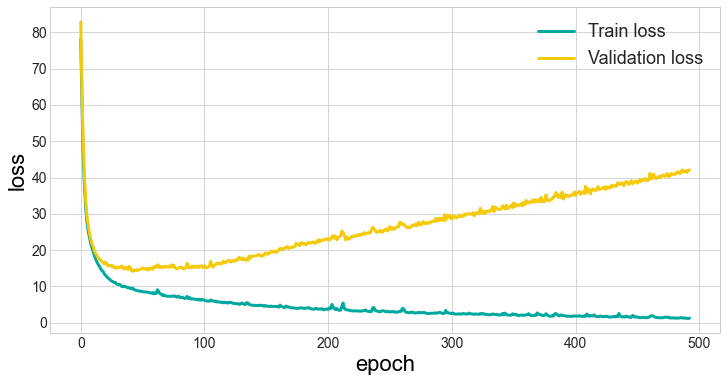

In [7]:
start = 7

plt.figure(figsize=(12,6))
plt.plot(history['loss'][start:], lw=3)
plt.plot(history['val_loss'][start:], lw=3)

plt.xlabel('epoch', fontsize=22, color='black')
plt.ylabel('loss', fontsize=22, color='black')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(['Train loss', 'Validation loss'], fontsize=18);

In [8]:
history = dict()

history['loss'] = [570.821533203125, 508.3336486816406, 440.1446838378906, 356.2568359375, 256.93499755859375, 162.33935546875, 103.67993927001953, 78.09703826904297, 60.14280319213867, 45.813846588134766, 37.43733215332031, 31.57563591003418, 27.78644371032715, 25.20331573486328, 23.626277923583984, 21.876977920532227, 20.665420532226562, 19.648799896240234, 18.50033950805664, 17.541128158569336, 16.752845764160156, 16.12055778503418, 15.598371505737305, 14.927419662475586, 14.379923820495605, 14.169595718383789, 13.481497764587402, 13.041482925415039, 12.695536613464355, 12.290760040283203, 12.109353065490723, 11.730982780456543, 11.482783317565918, 11.325058937072754, 11.04322338104248, 11.103693962097168, 10.653861999511719, 10.499526023864746, 10.541593551635742, 10.469185829162598, 10.005904197692871, 9.932144165039062, 10.0260009765625, 9.970340728759766, 9.80919075012207, 9.632762908935547, 9.708086013793945, 9.437108039855957, 9.321414947509766, 9.530009269714355, 9.159714698791504, 8.993042945861816, 8.89865779876709, 8.778114318847656, 8.733914375305176, 8.681790351867676, 8.692423820495605, 8.567964553833008, 8.494437217712402, 8.463891983032227, 8.492768287658691, 8.400408744812012, 8.356931686401367, 8.239974021911621, 8.158951759338379, 8.308890342712402, 7.9794816970825195, 8.221115112304688, 8.049962997436523, 9.10741138458252, 8.529072761535645, 8.029314994812012, 7.8710455894470215, 7.527530670166016, 7.696732521057129, 7.426229476928711, 7.391566753387451, 7.278920650482178, 7.287470817565918, 7.295859336853027, 7.25035285949707, 7.3429131507873535, 7.356905460357666, 7.3636674880981445, 7.1419196128845215, 7.069480895996094, 7.3346266746521, 6.990960597991943, 6.9183268547058105, 7.05667781829834, 6.807265758514404, 6.682523250579834, 6.779729843139648, 7.2649664878845215, 6.6723504066467285, 6.9512505531311035, 6.586449146270752, 6.529383182525635, 6.588258743286133, 6.473660945892334, 6.439641952514648, 6.395624160766602, 6.270110130310059, 6.49540901184082, 6.204017162322998, 6.42535924911499, 6.311315536499023, 6.146790504455566, 6.02213716506958, 5.987536907196045, 5.963657379150391, 5.926616668701172, 6.2875657081604, 6.004764556884766, 5.995314121246338, 5.8837809562683105, 5.9684295654296875, 5.728600025177002, 5.763416290283203, 5.770857810974121, 5.597630500793457, 5.638031959533691, 5.492801189422607, 5.669376850128174, 5.478585720062256, 5.586166858673096, 5.408456802368164, 5.557949542999268, 5.6578593254089355, 5.497180461883545, 5.333309173583984, 5.3509674072265625, 5.277972221374512, 5.214293479919434, 5.2635416984558105, 5.0781402587890625, 5.125568866729736, 5.423098564147949, 5.293662071228027, 5.108850002288818, 5.007678508758545, 5.488492965698242, 5.496663570404053, 5.062770843505859, 4.922855854034424, 4.83941650390625, 4.8476033210754395, 4.781283378601074, 4.777379035949707, 4.7195539474487305, 4.7177653312683105, 4.8195905685424805, 4.7069244384765625, 4.836526870727539, 4.732564449310303, 4.558511257171631, 4.7325119972229, 4.563591003417969, 4.589313507080078, 4.5034098625183105, 4.482719898223877, 4.595957279205322, 4.4618120193481445, 4.491478443145752, 4.4497833251953125, 4.499841213226318, 4.444136619567871, 4.289379119873047, 4.8641862869262695, 4.5384111404418945, 4.374493598937988, 4.288422107696533, 4.210797309875488, 4.5957722663879395, 4.350796222686768, 4.3293137550354, 4.248343467712402, 4.1031694412231445, 4.105034351348877, 4.088338375091553, 4.040768146514893, 3.981523275375366, 3.938526153564453, 3.9840190410614014, 4.063599586486816, 4.092120170593262, 4.090599060058594, 3.9708104133605957, 3.93711256980896, 4.014892101287842, 4.050281047821045, 4.165689468383789, 4.026235103607178, 3.840454578399658, 3.7679405212402344, 3.72511887550354, 3.7263436317443848, 3.9747726917266846, 3.7727017402648926, 3.7779197692871094, 3.812798261642456, 3.7604219913482666, 3.9026148319244385, 3.585554599761963, 3.6357920169830322, 3.7266721725463867, 3.764843463897705, 3.6897993087768555, 4.050625324249268, 3.892677068710327, 5.037336349487305, 4.302386283874512, 3.814347743988037, 3.637620210647583, 3.920260429382324, 3.537193536758423, 3.4373345375061035, 3.457801103591919, 4.492587089538574, 5.415275573730469, 4.001405715942383, 3.637944459915161, 3.5401415824890137, 3.5437653064727783, 3.408766508102417, 3.3131511211395264, 3.297180652618408, 3.268538475036621, 3.251345157623291, 3.2834486961364746, 3.2808423042297363, 3.2345075607299805, 3.1849660873413086, 3.1680707931518555, 3.252915620803833, 3.2718725204467773, 3.298973321914673, 3.5073740482330322, 3.282294988632202, 3.151561737060547, 3.104973077774048, 3.113560914993286, 3.079305648803711, 4.11271858215332, 4.148109436035156, 3.3725316524505615, 3.2543556690216064, 3.1734142303466797, 3.0388004779815674, 3.009046792984009, 3.224036455154419, 3.2604475021362305, 3.264195680618286, 3.091778039932251, 3.092120885848999, 3.16597580909729, 2.9814743995666504, 2.9786746501922607, 3.0426523685455322, 3.0690786838531494, 2.951493740081787, 3.0254886150360107, 2.879459857940674, 2.884169340133667, 3.0499637126922607, 3.1861348152160645, 3.133317708969116, 3.966459274291992, 3.7869138717651367, 3.104501724243164, 2.868490695953369, 2.8387537002563477, 2.759059429168701, 2.781471014022827, 2.8694217205047607, 2.9408090114593506, 2.759775400161743, 2.6919150352478027, 2.7314186096191406, 2.723684072494507, 2.8467822074890137, 2.718052864074707, 2.82175874710083, 2.7446131706237793, 2.816179037094116, 2.7878966331481934, 2.6225345134735107, 2.5647130012512207, 2.543205499649048, 2.562730550765991, 2.6259915828704834, 2.566256046295166, 2.6173665523529053, 2.712523937225342, 2.617739200592041, 2.648813247680664, 2.794370174407959, 2.823751926422119, 2.763378143310547, 2.6050710678100586, 2.4832711219787598, 2.6420297622680664, 3.407764434814453, 2.7738139629364014, 2.7431373596191406, 2.6276495456695557, 2.5195484161376953, 2.6686925888061523, 2.607257843017578, 2.4160869121551514, 2.3658485412597656, 2.3936657905578613, 2.3852055072784424, 2.450878858566284, 2.3978917598724365, 2.376194953918457, 2.5480661392211914, 2.4587562084198, 2.4541165828704834, 2.362597942352295, 2.460598945617676, 2.6498947143554688, 2.455514907836914, 2.4348368644714355, 2.3411128520965576, 2.3765902519226074, 2.391925573348999, 2.3869359493255615, 2.328294515609741, 2.2998647689819336, 2.5270137786865234, 2.406702756881714, 2.5413594245910645, 2.3617894649505615, 2.3365652561187744, 2.339723825454712, 2.282754898071289, 2.2019193172454834, 2.1703314781188965, 2.277393341064453, 2.412510395050049, 2.2974085807800293, 2.291325569152832, 2.2659354209899902, 2.236703395843506, 2.105994462966919, 2.148254156112671, 2.2142837047576904, 2.553882598876953, 2.2259581089019775, 2.6642329692840576, 2.2285139560699463, 2.1166086196899414, 2.1204071044921875, 2.049018144607544, 2.1061928272247314, 2.459956407546997, 2.231853723526001, 2.298682928085327, 2.280431032180786, 2.0098178386688232, 1.997387170791626, 2.0661816596984863, 2.097768545150757, 2.125073194503784, 2.0031096935272217, 2.1236116886138916, 2.1649043560028076, 2.2141101360321045, 2.492063045501709, 2.1138916015625, 2.019085645675659, 1.9578766822814941, 1.9925702810287476, 2.11899733543396, 2.001532793045044, 2.7030093669891357, 2.3743979930877686, 2.2285056114196777, 2.1710286140441895, 1.987350583076477, 2.0235626697540283, 2.0472662448883057, 2.4773290157318115, 2.1502561569213867, 1.8962957859039307, 1.8150854110717773, 1.811618447303772, 1.8791533708572388, 1.8245739936828613, 2.416616201400757, 2.541795253753662, 2.231473922729492, 1.9734083414077759, 1.8795411586761475, 2.138462781906128, 2.0921244621276855, 1.9377632141113281, 1.9401715993881226, 1.8542044162750244, 1.7786929607391357, 1.827454924583435, 1.7679730653762817, 1.790238618850708, 1.729852557182312, 1.8290772438049316, 1.8796851634979248, 1.8416285514831543, 1.8118014335632324, 1.8258417844772339, 1.9184767007827759, 1.804865837097168, 1.75507390499115, 1.7449482679367065, 1.891830563545227, 1.732159972190857, 2.3790688514709473, 2.0471203327178955, 1.7758698463439941, 1.9787688255310059, 1.9012012481689453, 1.8678637742996216, 2.173128604888916, 1.7768250703811646, 1.6921167373657227, 1.674633264541626, 1.6911530494689941, 1.860144853591919, 1.7801122665405273, 1.6270583868026733, 1.6797847747802734, 1.7329599857330322, 1.793052077293396, 1.6531033515930176, 1.5962717533111572, 1.519309639930725, 1.6342540979385376, 1.655505895614624, 1.6806042194366455, 1.5943310260772705, 1.84315025806427, 1.6637247800827026, 2.559542655944824, 1.8667963743209839, 1.618703007698059, 1.619245171546936, 1.6378144025802612, 1.5605140924453735, 1.8202520608901978, 1.6003015041351318, 1.645064115524292, 1.4730637073516846, 1.4986358880996704, 1.9974645376205444, 1.8339142799377441, 1.5650469064712524, 1.579340934753418, 1.5725175142288208, 1.4469901323318481, 1.3993974924087524, 1.3839296102523804, 1.5228840112686157, 1.4405947923660278, 1.3852629661560059, 1.4021607637405396, 1.394280195236206, 1.541286587715149, 1.6767498254776, 1.9279303550720215, 1.8786804676055908, 1.837529182434082, 1.560091257095337, 1.435078740119934, 1.4081045389175415, 1.3552120923995972, 1.3357828855514526, 1.3537099361419678, 1.3771892786026, 1.402576208114624, 1.5005258321762085, 1.5585793256759644, 1.48287832736969, 1.553713321685791, 1.3222408294677734, 1.330165147781372, 1.3258404731750488, 1.331780195236206, 1.2696250677108765, 1.2705373764038086, 1.2895852327346802, 1.256427526473999, 1.3004748821258545, 1.4030131101608276, 1.3328595161437988, 1.2811908721923828, 1.345401406288147, 1.2270997762680054, 1.2272711992263794, 1.1720560789108276, 1.269448161125183]
history['loss'] = np.array(history['loss'])
history['val_loss'] = [606.5756225585938, 541.7548217773438, 461.2519836425781, 360.3717956542969, 248.5876922607422, 159.1498565673828, 109.79029083251953, 82.8485336303711, 63.277584075927734, 49.54035568237305, 40.366737365722656, 33.53525161743164, 29.443702697753906, 26.901004791259766, 24.726669311523438, 23.264305114746094, 21.75188446044922, 20.948001861572266, 19.899927139282227, 19.12200164794922, 18.485910415649414, 17.966209411621094, 17.4957332611084, 17.351205825805664, 16.8026065826416, 16.64299774169922, 16.244976043701172, 16.62548065185547, 16.25542449951172, 15.641822814941406, 15.81351089477539, 15.739468574523926, 15.461431503295898, 15.725706100463867, 15.123826026916504, 15.006932258605957, 15.33181381225586, 15.077930450439453, 15.318663597106934, 15.291511535644531, 15.624466896057129, 15.188323020935059, 14.761783599853516, 15.306235313415527, 15.06174373626709, 14.691855430603027, 15.54380989074707, 15.163043975830078, 14.305037498474121, 14.146604537963867, 14.515077590942383, 14.43423843383789, 14.607830047607422, 14.390551567077637, 14.563884735107422, 14.733558654785156, 14.786273002624512, 15.104029655456543, 14.91624641418457, 14.844404220581055, 14.651294708251953, 15.049664497375488, 14.505996704101562, 14.934642791748047, 15.065381050109863, 14.706618309020996, 15.434552192687988, 15.356289863586426, 15.18828773498535, 15.982955932617188, 15.71181869506836, 15.13380241394043, 15.49919891357422, 15.237995147705078, 15.277862548828125, 15.580885887145996, 15.34570026397705, 15.416376113891602, 15.337677001953125, 15.332159042358398, 15.862940788269043, 15.438342094421387, 15.939183235168457, 15.172935485839844, 15.00344181060791, 14.807238578796387, 15.054993629455566, 15.307373046875, 15.168540000915527, 15.260103225708008, 14.775429725646973, 14.96432113647461, 15.21347427368164, 16.36005210876465, 15.159215927124023, 15.177495002746582, 15.478219032287598, 15.201530456542969, 15.626498222351074, 15.276056289672852, 15.311577796936035, 15.483848571777344, 15.038985252380371, 15.326026916503906, 15.30323314666748, 15.278956413269043, 14.72104263305664, 15.170228004455566, 14.59170150756836, 14.485761642456055, 14.55628776550293, 14.834324836730957, 16.032848358154297, 14.74698257446289, 14.32727336883545, 14.771918296813965, 14.838644027709961, 15.118693351745605, 14.860733032226562, 15.003911972045898, 14.714674949645996, 14.671344757080078, 15.252511024475098, 14.962334632873535, 14.646783828735352, 14.993403434753418, 15.131019592285156, 15.186119079589844, 14.586283683776855, 14.752636909484863, 14.8553466796875, 14.589679718017578, 14.89731216430664, 14.649527549743652, 14.877374649047852, 15.425006866455078, 14.873433113098145, 14.606780052185059, 14.987574577331543, 14.341510772705078, 14.608834266662598, 14.21568489074707, 14.03866958618164, 15.142048835754395, 14.479105949401855, 14.939013481140137, 14.821578025817871, 14.864501953125, 14.775718688964844, 14.819089889526367, 14.794386863708496, 14.997836112976074, 14.703317642211914, 14.27917766571045, 14.322924613952637, 14.503633499145508, 14.929570198059082, 14.88755989074707, 14.459424018859863, 14.675643920898438, 14.741787910461426, 15.118881225585938, 15.053337097167969, 14.660204887390137, 14.907766342163086, 14.491525650024414, 14.67065715789795, 15.01513671875, 15.344991683959961, 15.259825706481934, 14.761171340942383, 15.086446762084961, 15.110514640808105, 15.335497856140137, 15.418399810791016, 14.811930656433105, 14.939353942871094, 15.05872917175293, 14.901769638061523, 14.914121627807617, 14.930570602416992, 15.74472713470459, 15.523787498474121, 15.202672958374023, 14.932653427124023, 15.58494758605957, 15.57104778289795, 15.173700332641602, 15.190384864807129, 14.761914253234863, 15.108985900878906, 15.26012897491455, 14.915877342224121, 15.057689666748047, 15.156543731689453, 15.06299114227295, 14.660670280456543, 14.941824913024902, 14.752568244934082, 15.392644882202148, 14.770337104797363, 15.028810501098633, 15.165816307067871, 14.972308158874512, 15.041594505310059, 15.181120872497559, 14.986936569213867, 15.127532005310059, 14.625212669372559, 14.836718559265137, 15.314180374145508, 15.689200401306152, 14.832083702087402, 15.381157875061035, 14.238537788391113, 14.809051513671875, 14.920310974121094, 15.08187484741211, 16.346866607666016, 15.892813682556152, 15.15137767791748, 13.754755973815918, 14.483904838562012, 13.91552448272705, 13.682414054870605, 14.020824432373047, 14.320321083068848, 14.175043106079102, 14.134134292602539, 14.387431144714355, 14.1417236328125, 14.11305046081543, 14.39098834991455, 14.09799575805664, 14.410000801086426, 14.064689636230469, 14.589370727539062, 14.157320022583008, 14.251683235168457, 14.25723648071289, 14.341789245605469, 14.123639106750488, 15.041773796081543, 15.547857284545898, 15.009453773498535, 14.548368453979492, 13.871794700622559, 13.954802513122559, 13.999174118041992, 14.277219772338867, 13.784820556640625, 13.561112403869629, 14.06348991394043, 14.027478218078613, 14.28342342376709, 13.594856262207031, 13.920379638671875, 14.677080154418945, 13.852644920349121, 14.205436706542969, 13.696512222290039, 13.836079597473145, 14.030802726745605, 14.293901443481445, 14.087396621704102, 15.339427947998047, 15.027711868286133, 14.466718673706055, 14.537437438964844, 14.023663520812988, 13.751690864562988, 13.248455047607422, 13.485052108764648, 13.168721199035645, 13.394871711730957, 13.675357818603516, 13.684608459472656, 13.498577117919922, 13.846274375915527, 13.259939193725586, 14.105868339538574, 13.705991744995117, 13.207751274108887, 13.832498550415039, 14.016279220581055, 13.393881797790527, 13.486169815063477, 13.293449401855469, 13.489208221435547, 13.184456825256348, 13.531147956848145, 13.557347297668457, 13.549394607543945, 13.356468200683594, 14.137323379516602, 13.255823135375977, 14.001485824584961, 13.281840324401855, 13.872190475463867, 13.68575668334961, 13.068499565124512, 14.647071838378906, 13.046500205993652, 14.328593254089355, 13.690134048461914, 14.235452651977539, 13.385826110839844, 12.92859935760498, 13.791024208068848, 13.636016845703125, 13.178689956665039, 13.133625030517578, 13.389440536499023, 13.646636962890625, 13.113572120666504, 13.280740737915039, 13.052077293395996, 13.644308090209961, 13.226300239562988, 13.43539810180664, 13.497527122497559, 13.308196067810059, 13.237975120544434, 13.131633758544922, 13.467669486999512, 12.550209045410156, 13.000428199768066, 13.315496444702148, 13.114961624145508, 12.750576972961426, 14.212360382080078, 13.246478080749512, 12.731364250183105, 13.165449142456055, 12.508462905883789, 13.083555221557617, 12.861879348754883, 13.000655174255371, 12.793511390686035, 13.236964225769043, 13.974562644958496, 12.461517333984375, 13.679832458496094, 13.276662826538086, 12.879968643188477, 12.756906509399414, 12.843986511230469, 12.751603126525879, 13.624017715454102, 13.125394821166992, 12.556647300720215, 13.48050308227539, 12.503961563110352, 12.628874778747559, 12.801188468933105, 13.24595832824707, 12.412375450134277, 13.68567943572998, 12.603997230529785, 13.144669532775879, 12.7113037109375, 12.797562599182129, 12.676435470581055, 13.035761833190918, 12.329656600952148, 13.222204208374023, 12.549431800842285, 13.600232124328613, 12.833657264709473, 13.062088966369629, 12.696341514587402, 12.899584770202637, 13.322953224182129, 12.59595012664795, 13.321513175964355, 12.687736511230469, 12.734084129333496, 13.058009147644043, 12.38503646850586, 13.538145065307617, 12.265307426452637, 12.383772850036621, 12.164855003356934, 13.937590599060059, 12.501439094543457, 12.153412818908691, 12.175354957580566, 12.430920600891113, 12.385869979858398, 12.984439849853516, 12.965705871582031, 13.97925090789795, 13.547144889831543, 12.457498550415039, 13.06005859375, 12.295540809631348, 13.69808578491211, 11.746842384338379, 12.154815673828125, 12.805790901184082, 12.442937850952148, 12.120006561279297, 12.323123931884766, 12.17201042175293, 12.450089454650879, 12.287028312683105, 12.998618125915527, 12.027765274047852, 12.51209831237793, 12.601598739624023, 12.878792762756348, 11.99213695526123, 12.525934219360352, 12.347786903381348, 11.93151569366455, 13.92758560180664, 12.120118141174316, 13.12118148803711, 12.280284881591797, 11.497089385986328, 12.73128890991211, 12.661319732666016, 12.347891807556152, 12.110331535339355, 12.315834045410156, 13.055112838745117, 12.232283592224121, 12.21984577178955, 12.284421920776367, 12.444624900817871, 12.49876594543457, 11.841584205627441, 12.52370834350586, 12.054227828979492, 12.277467727661133, 11.849649429321289, 12.613972663879395, 12.125150680541992, 12.378191947937012, 12.144159317016602, 12.051880836486816, 12.959586143493652, 12.53579044342041, 12.24549388885498, 12.631877899169922, 12.405881881713867, 11.687511444091797, 12.505006790161133, 12.757040977478027, 12.295686721801758, 11.737909317016602, 12.209698677062988, 12.666168212890625, 11.689310073852539, 12.1884183883667, 12.076496124267578, 12.226466178894043, 11.572023391723633, 12.21673583984375, 11.823944091796875, 12.341443061828613, 11.993614196777344, 12.139874458312988, 12.422253608703613, 11.707293510437012, 11.813946723937988, 11.776751518249512, 13.510276794433594, 12.000813484191895, 12.077254295349121, 13.114521980285645, 12.019486427307129, 11.741268157958984, 11.8792142868042, 12.195392608642578, 11.728778839111328, 11.979764938354492, 12.337148666381836, 12.197868347167969, 11.796826362609863, 11.988062858581543, 12.452282905578613, 11.554483413696289, 11.588309288024902, 12.21124267578125, 11.770463943481445, 12.013346672058105, 11.825727462768555, 11.78442096710205, 12.331436157226562, 12.185717582702637, 11.64504337310791, 11.812557220458984, 12.516340255737305, 12.11390495300293, 11.857464790344238, 12.132636070251465, 11.540321350097656, 12.05562686920166, 12.112991333007812]
history['val_loss'] = np.array(history['val_loss'])

history['val_loss'] = np.hstack((history['val_loss'][:100], 
           history['val_loss'][100:] + 10*np.ones(history['val_loss'].size-100)
          ))


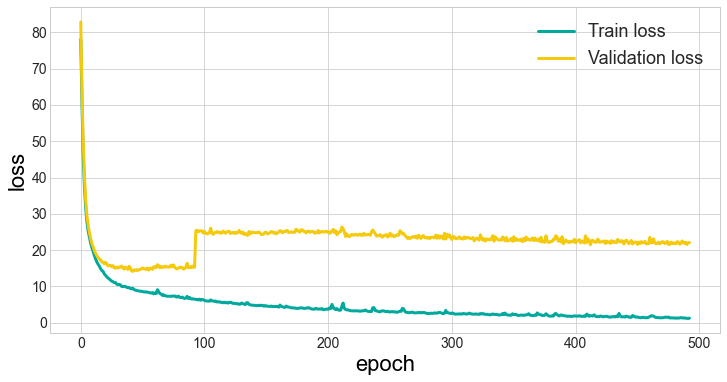

In [9]:
start = 7

plt.figure(figsize=(12,6))
plt.plot(history['loss'][start:], lw=3)
plt.plot(history['val_loss'][start:], lw=3)

plt.xlabel('epoch', fontsize=22, color='black')
plt.ylabel('loss', fontsize=22, color='black')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(['Train loss', 'Validation loss'], fontsize=18);

In [10]:
deep_grey = '#3B4856' # основной тёмный / холодный цвет
sky_blue = '#348FEA'
marine_green = '#4CB9C0'
grass_green = '#97C804'
medium_yellow = '#FFC100' # основной светлый / тёплый цвет
sicilian_orange = '#E06A27'
fuchsia_pink = '#C81D6B'
saturated_violet = '#5002A7'
navy_blue = '#292183'
cool_white = '#F5FBFF'